In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/supply-chain-analysis/supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.shape

(100, 24)

In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
# Checking the data types
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [6]:
df.select_dtypes(include='object').nunique()

Product type               3
SKU                      100
Customer demographics      4
Shipping carriers          3
Supplier name              5
Location                   5
Inspection results         3
Transportation modes       4
Routes                     3
dtype: int64

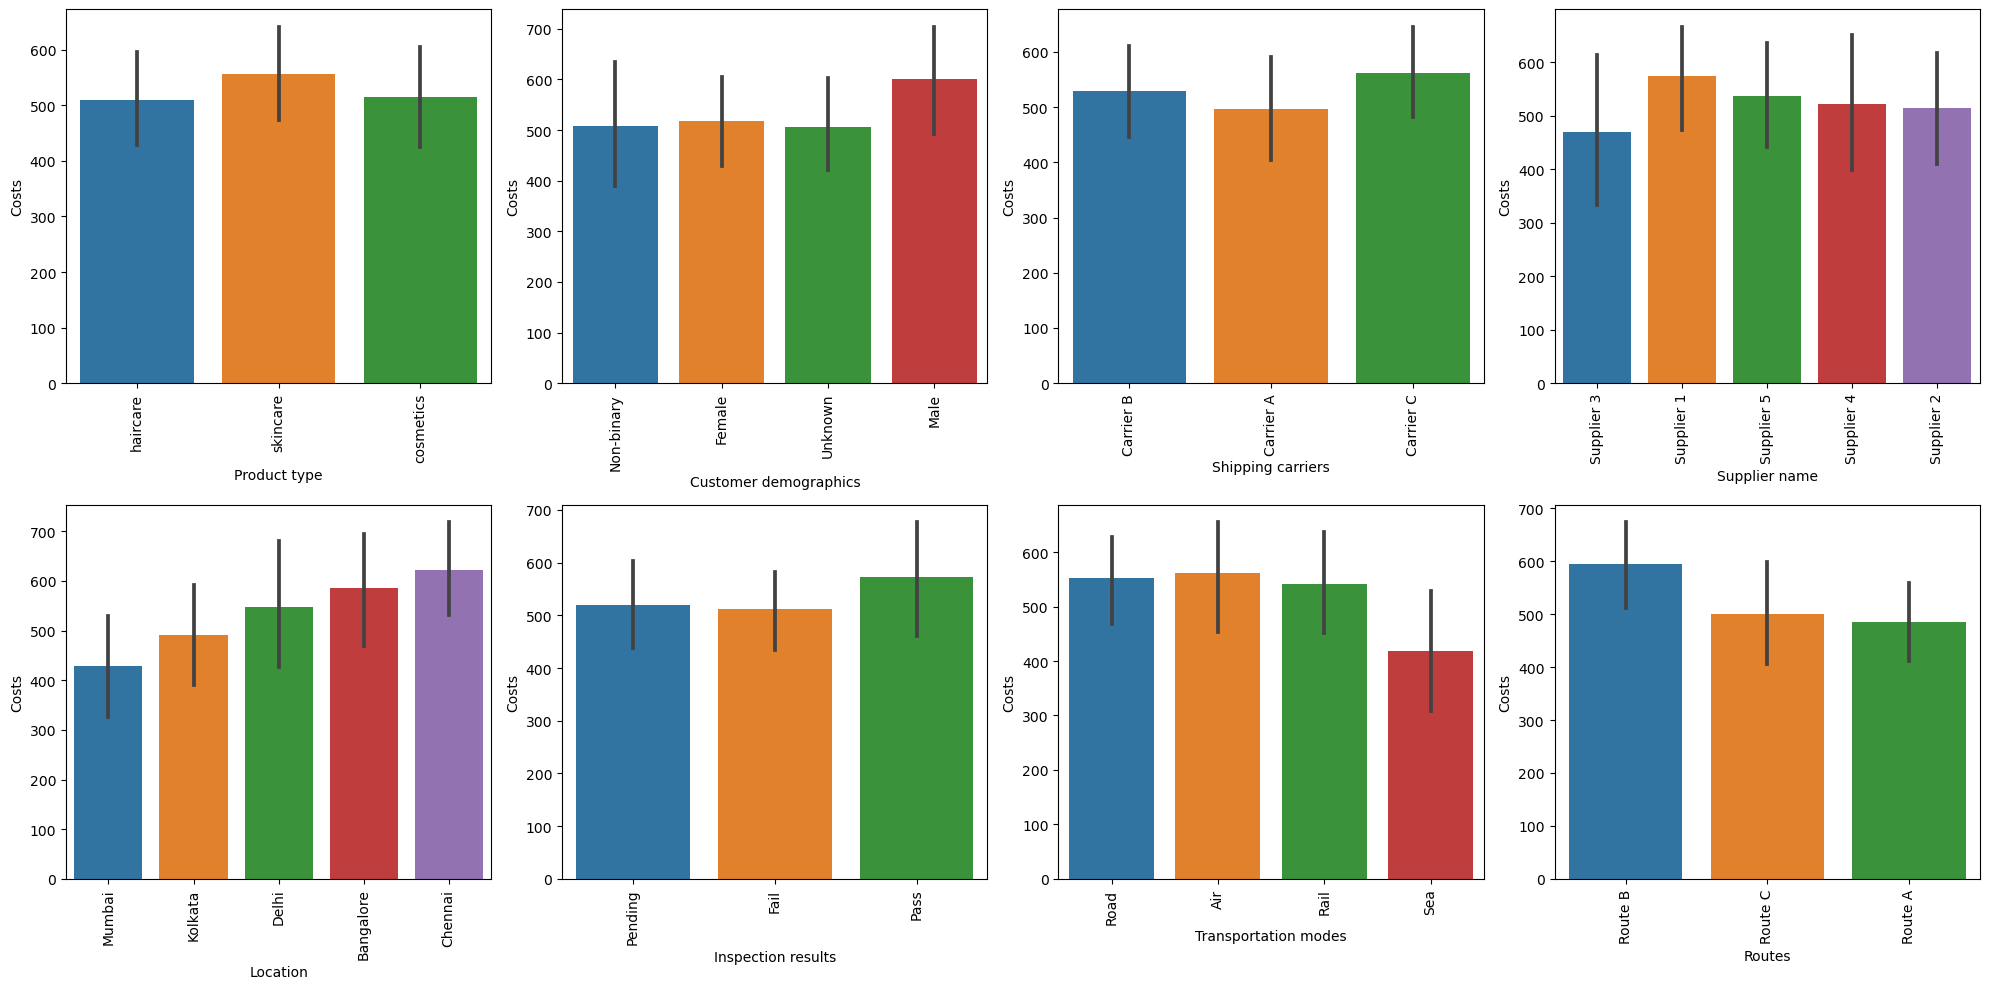

In [7]:
# Checking relation between the categorical columns and Costs 
cat_vars = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 
            'Inspection results', 'Transportation modes', 'Routes']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# creating barplot for each categorical row
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Costs', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

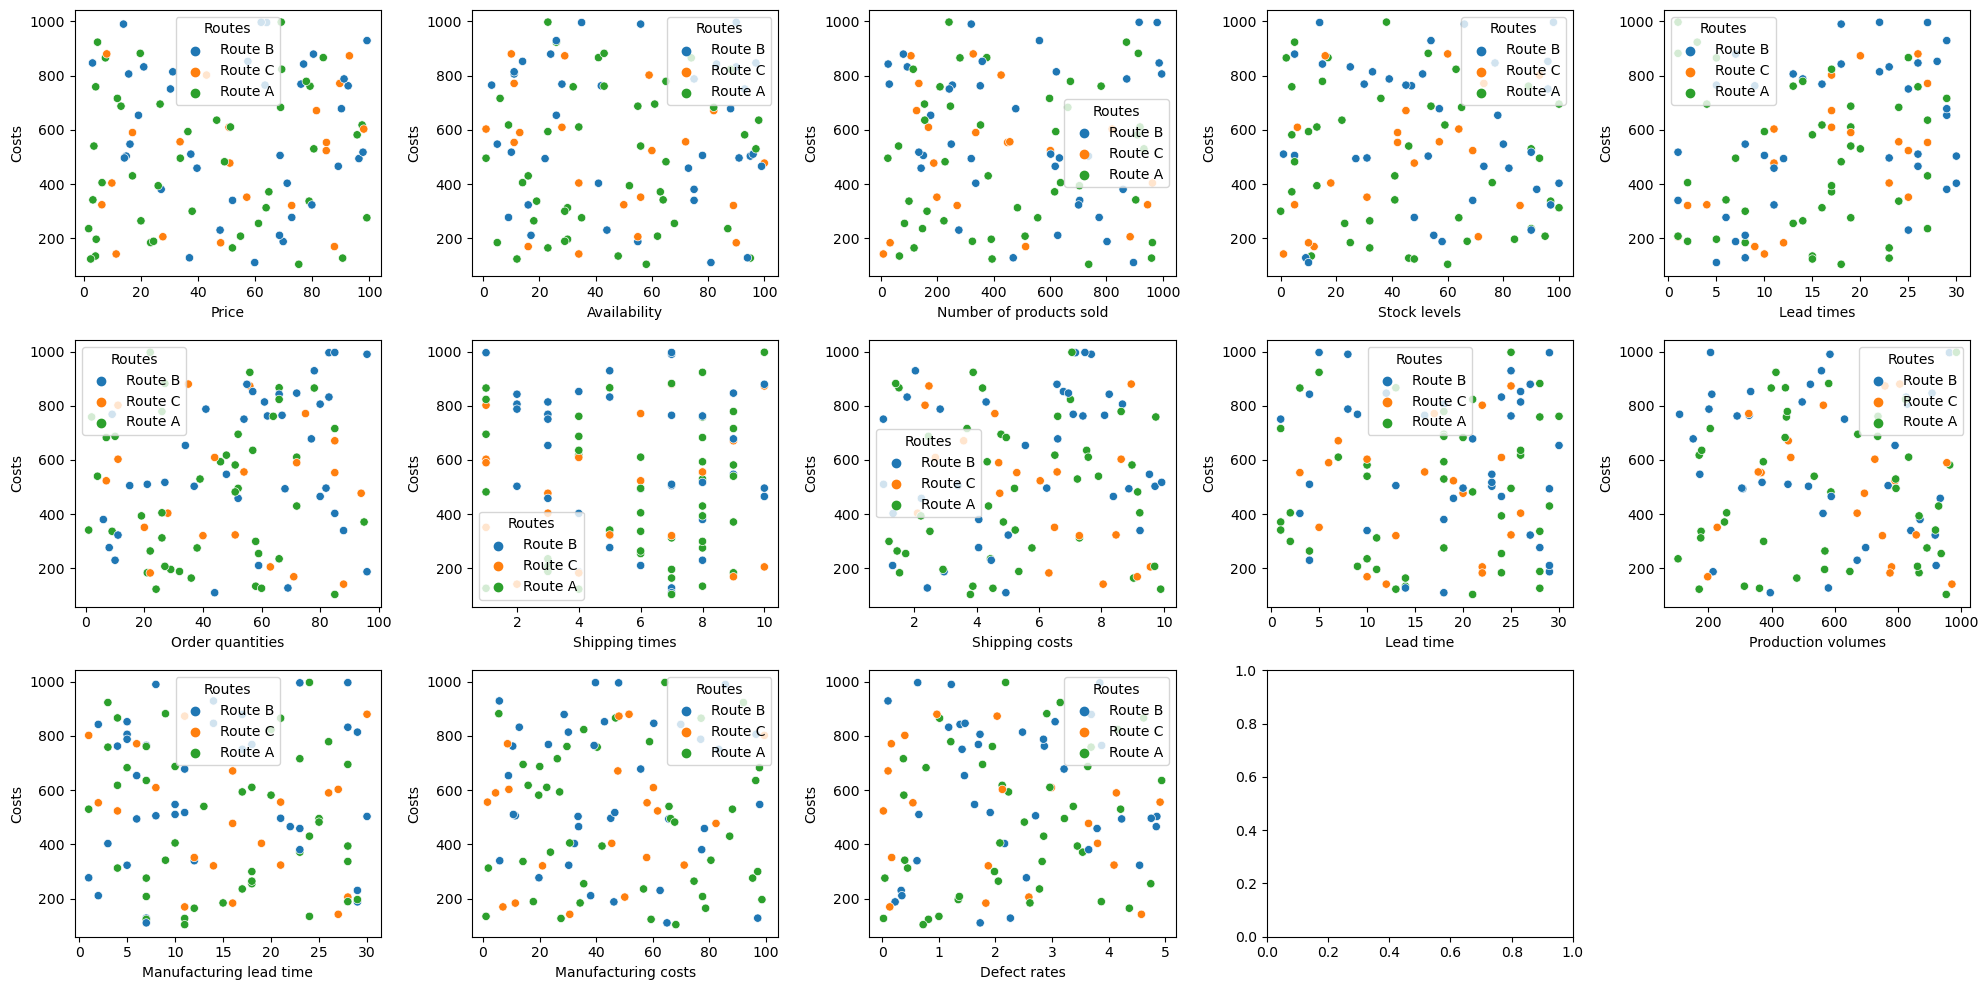

In [8]:
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels', 
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Costs', hue='Routes', data=df, ax=axs[i])

fig.delaxes(axs[14])    

fig.tight_layout()

plt.show()

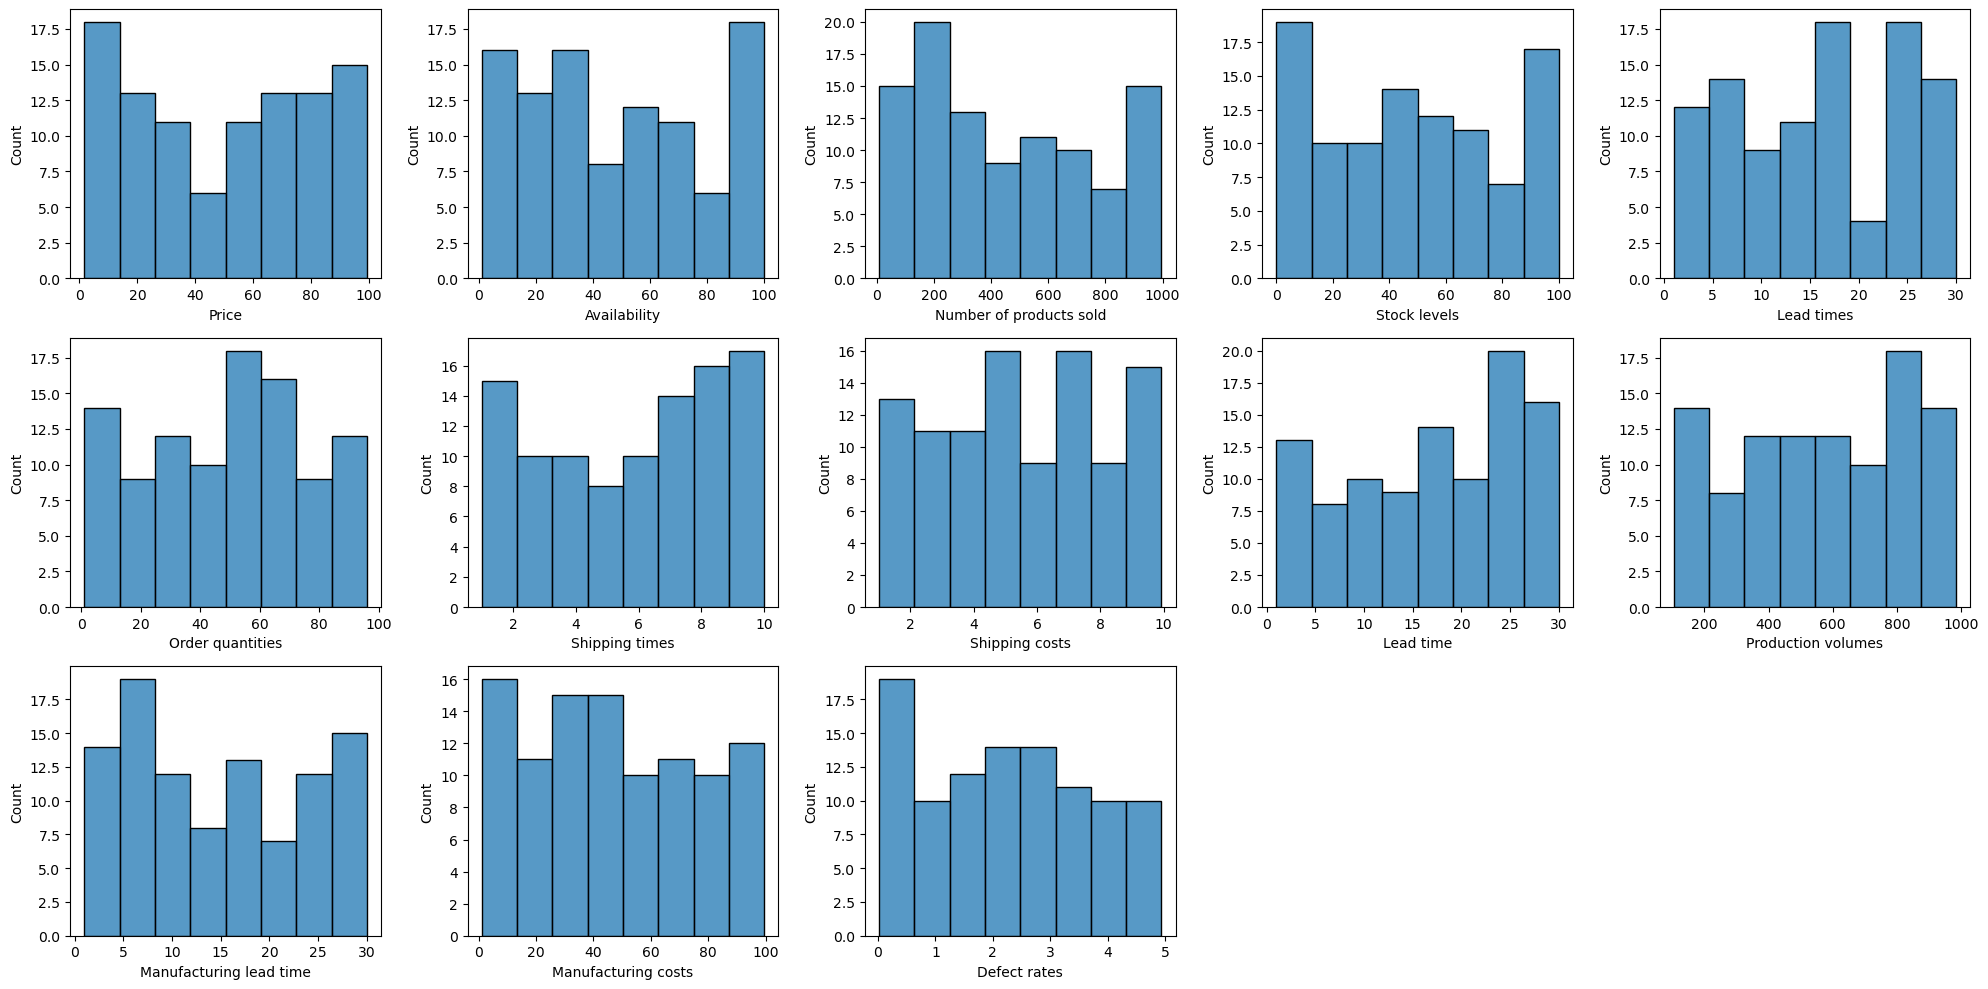

In [9]:
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels', 
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

In [10]:
# Checking null values
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [11]:
for col in df.select_dtypes(include = ['object']).columns:
    
    print(f" {col}: {df[col].unique()}")

 Product type: ['haircare' 'skincare' 'cosmetics']
 SKU: ['SKU0' 'SKU1' 'SKU2' 'SKU3' 'SKU4' 'SKU5' 'SKU6' 'SKU7' 'SKU8' 'SKU9'
 'SKU10' 'SKU11' 'SKU12' 'SKU13' 'SKU14' 'SKU15' 'SKU16' 'SKU17' 'SKU18'
 'SKU19' 'SKU20' 'SKU21' 'SKU22' 'SKU23' 'SKU24' 'SKU25' 'SKU26' 'SKU27'
 'SKU28' 'SKU29' 'SKU30' 'SKU31' 'SKU32' 'SKU33' 'SKU34' 'SKU35' 'SKU36'
 'SKU37' 'SKU38' 'SKU39' 'SKU40' 'SKU41' 'SKU42' 'SKU43' 'SKU44' 'SKU45'
 'SKU46' 'SKU47' 'SKU48' 'SKU49' 'SKU50' 'SKU51' 'SKU52' 'SKU53' 'SKU54'
 'SKU55' 'SKU56' 'SKU57' 'SKU58' 'SKU59' 'SKU60' 'SKU61' 'SKU62' 'SKU63'
 'SKU64' 'SKU65' 'SKU66' 'SKU67' 'SKU68' 'SKU69' 'SKU70' 'SKU71' 'SKU72'
 'SKU73' 'SKU74' 'SKU75' 'SKU76' 'SKU77' 'SKU78' 'SKU79' 'SKU80' 'SKU81'
 'SKU82' 'SKU83' 'SKU84' 'SKU85' 'SKU86' 'SKU87' 'SKU88' 'SKU89' 'SKU90'
 'SKU91' 'SKU92' 'SKU93' 'SKU94' 'SKU95' 'SKU96' 'SKU97' 'SKU98' 'SKU99']
 Customer demographics: ['Non-binary' 'Female' 'Unknown' 'Male']
 Shipping carriers: ['Carrier B' 'Carrier A' 'Carrier C']
 Supplier name: ['

In [12]:
# labeling the categories
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()
    
    label_encoder.fit(df[col].unique())
    
    df[col] = label_encoder.transform(df[col])
    
    print (f" {col}: { df[col].unique()}")

 Product type: [1 2 0]
 SKU: [ 0  1 12 23 34 45 56 67 78 89  2  3  4  5  6  7  8  9 10 11 13 14 15 16
 17 18 19 20 21 22 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42
 43 44 46 47 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 68 69
 70 71 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95
 96 97 98 99]
 Customer demographics: [2 0 3 1]
 Shipping carriers: [1 0 2]
 Supplier name: [2 0 4 3 1]
 Location: [4 3 2 0 1]
 Inspection results: [2 0 1]
 Transportation modes: [2 0 1 3]
 Routes: [1 2 0]


In [13]:
df.dtypes

Product type                 int64
SKU                          int64
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics        int64
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers            int64
Shipping costs             float64
Supplier name                int64
Location                     int64
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results           int64
Defect rates               float64
Transportation modes         int64
Routes                       int64
Costs                      float64
dtype: object

<AxesSubplot:>

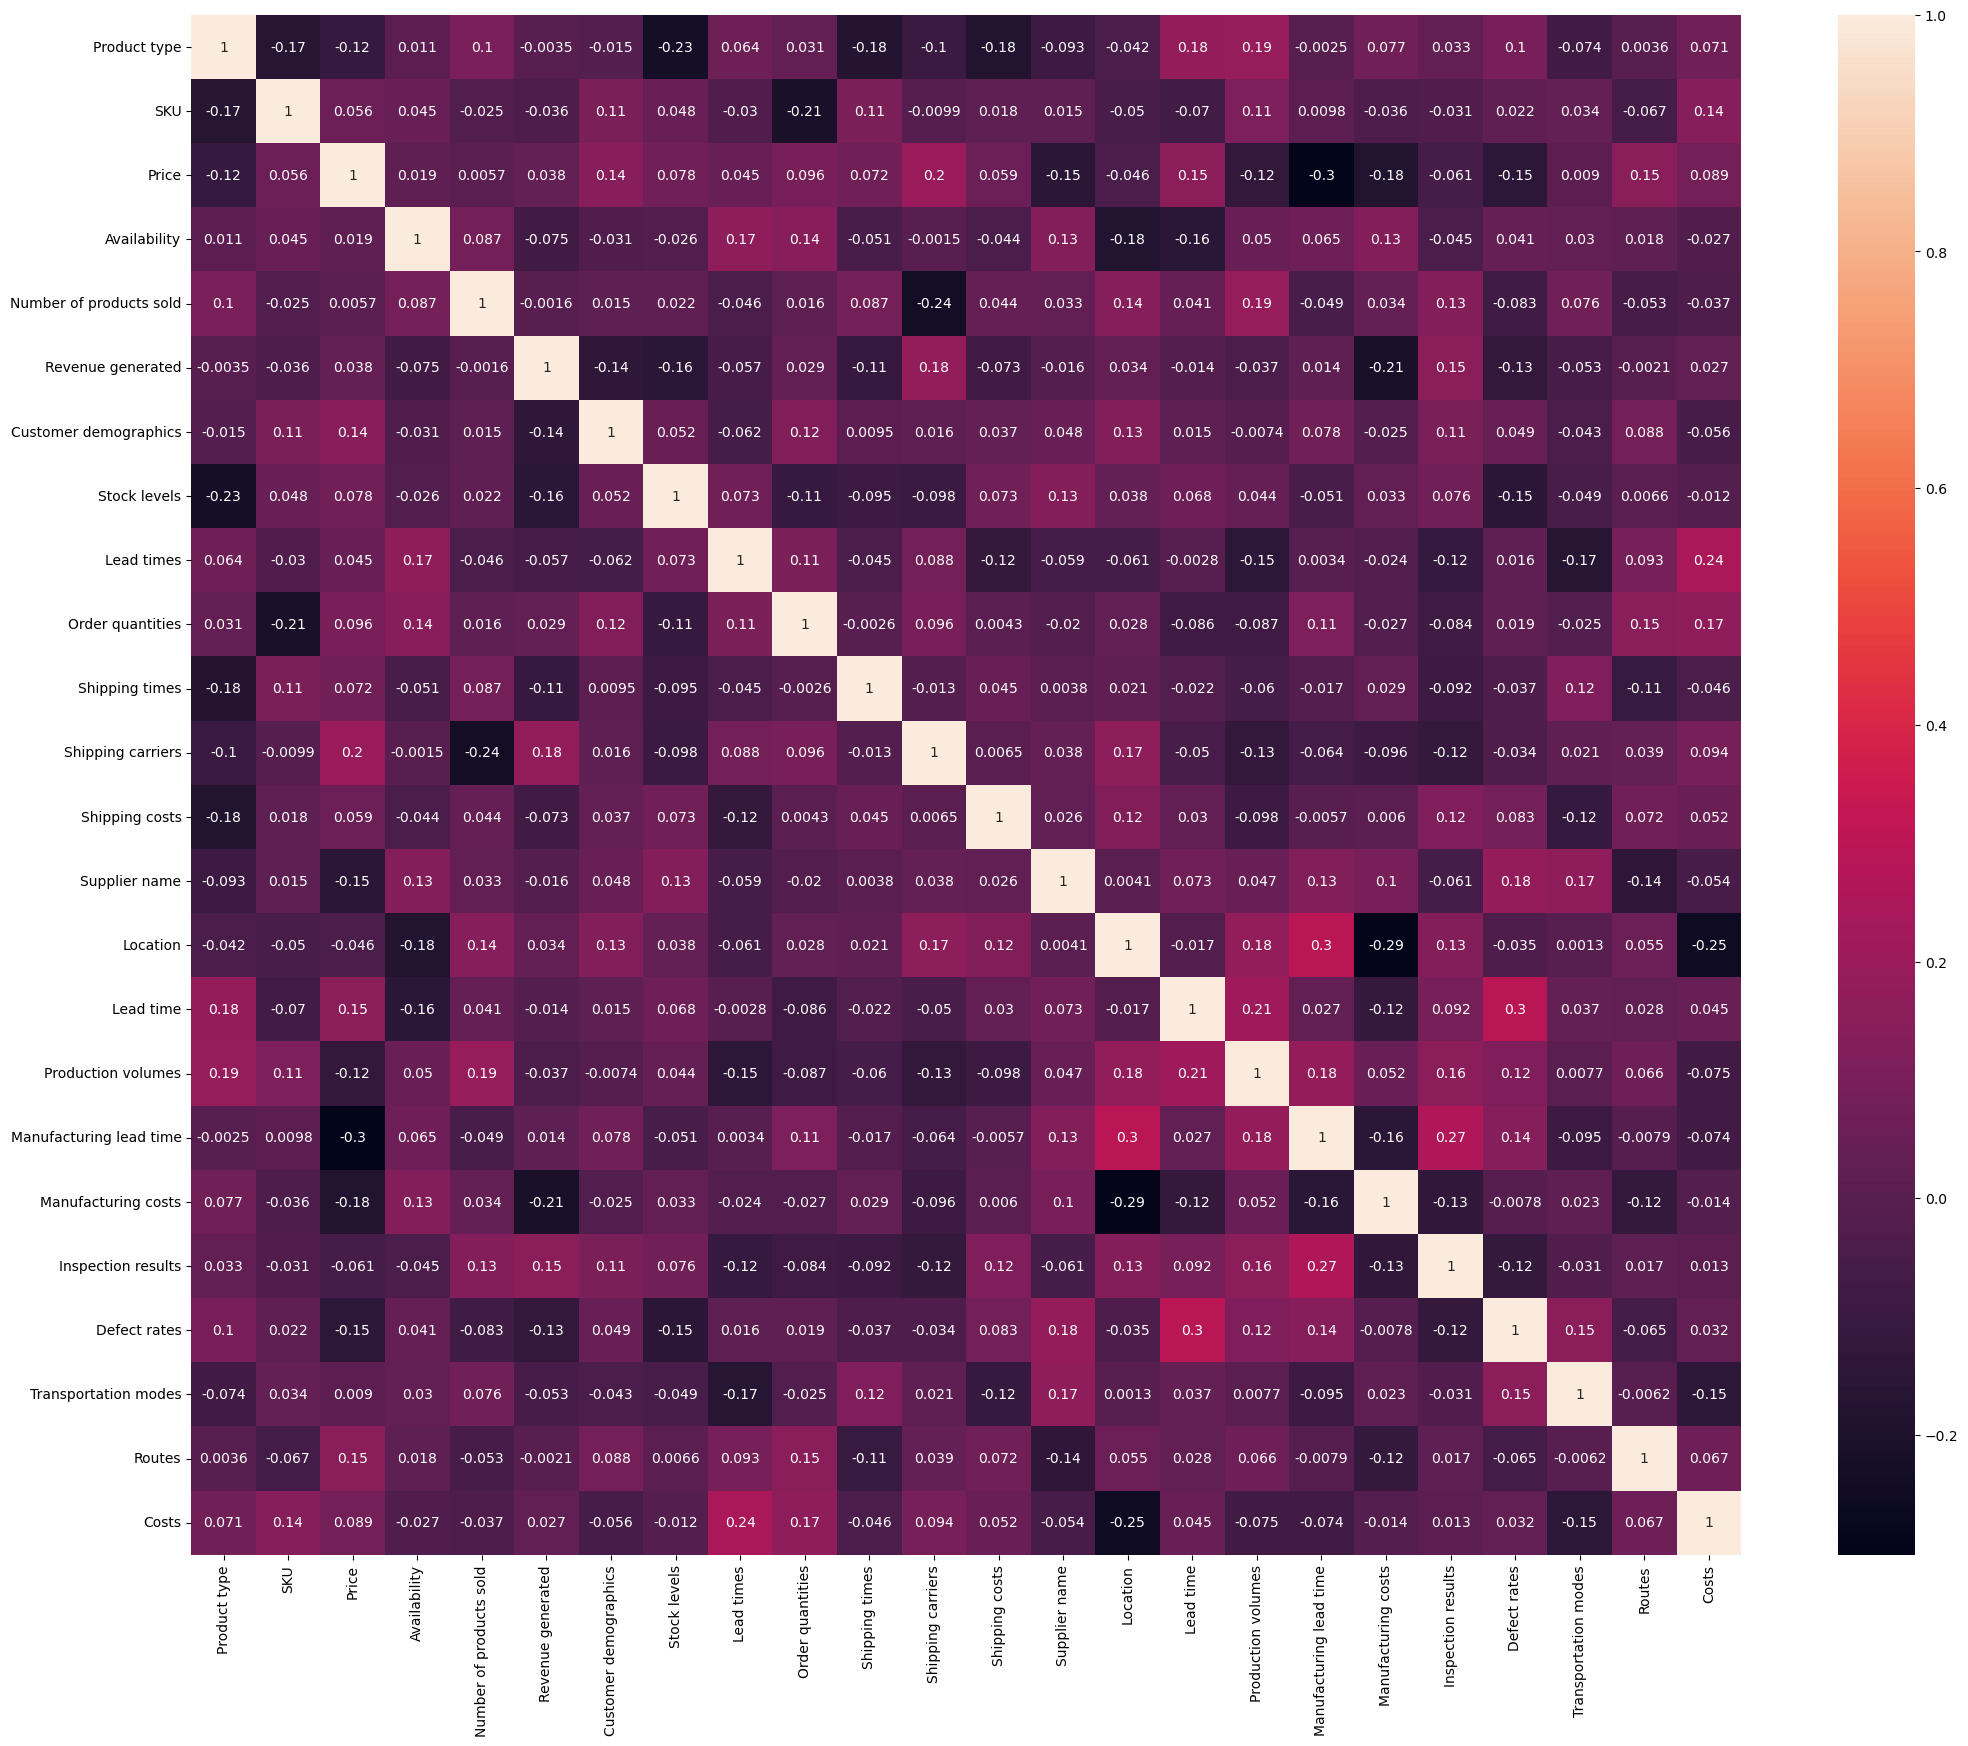

In [14]:
# The dataset is highly correlated to each other
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), fmt= '.2g' , annot=True)

In [15]:
X = df.drop('Costs', axis =1)
y = df['Costs']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
# Splitting dataset for train test 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

In [19]:
# Using Grid Search to find the best parameters for the model
tree = DecisionTreeRegressor()

param_grid = {
     'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 7, 42]
    
}


grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}


In [20]:
tree = DecisionTreeRegressor(random_state=42, max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=2)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=3,
                      random_state=42)

In [21]:
y_pred = tree.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

In [22]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 274.2171846828597
MAPE is 0.6652469240325344
MSE is 95895.88359218993
R2 score is -0.43103823561793364
RMSE score is 309.6706049856685


In [23]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

rf = RandomForestRegressor(random_state=0, max_depth=2, max_features='sqrt')

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features='sqrt', random_state=0)

In [24]:
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

In [25]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 255.4084698156336
MAPE is 0.6201858241293485
MSE is 76198.75315154795
R2 score is -0.1371012517075183
RMSE score is 276.04121639992087


In [26]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [27]:
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

In [28]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 275.34231105118806
MAPE is 0.6419529986442376
MSE is 89070.39389446782
R2 score is -0.32918259418295404
RMSE score is 298.4466349189882


In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

In [31]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 228.91034425968178
MAPE is 0.5366254483811407
MSE is 67203.53457327481
R2 score is -0.002867108999248469
RMSE score is 259.2364453028833


In [32]:
# All the algorithms used produce bad results as the dataset is very small and the model cannot train on this small data
